7. Demonstrate how dimensionality reduction using factor anlaysis approach and obtain the loadings and communalities

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('bfi.csv')
df = df.dropna()
df.head()

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
5,61623,6.0,6.0,5.0,6.0,5.0,6.0,6.0,6.0,1.0,...,2.0,3.0,4.0,3,5.0,6.0,1.0,2,3.0,21
7,61629,4.0,3.0,1.0,5.0,1.0,3.0,2.0,4.0,2.0,...,6.0,4.0,3.0,2,4.0,5.0,3.0,1,2.0,19
10,61634,4.0,4.0,5.0,6.0,5.0,4.0,3.0,5.0,3.0,...,2.0,3.0,5.0,3,5.0,6.0,3.0,1,1.0,21
14,61640,4.0,5.0,2.0,2.0,1.0,5.0,5.0,5.0,2.0,...,2.0,3.0,5.0,2,5.0,5.0,5.0,1,1.0,17
22,61661,1.0,5.0,6.0,5.0,6.0,4.0,3.0,2.0,4.0,...,2.0,2.0,6.0,1,5.0,5.0,2.0,1,5.0,68


In [3]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi, p = calculate_bartlett_sphericity(df)
print("Chi squared value : ",chi)
print("p value : ",p)

Chi squared value :  17377.993172657556
p value :  0.0


In [4]:
from factor_analyzer.factor_analyzer import  calculate_kmo
kmo_vars,kmo_model = calculate_kmo(df)
print(kmo_model)

0.8378793429475183


In [5]:
from factor_analyzer.factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer()
fa.fit(df)

FactorAnalyzer(rotation_kwargs={})

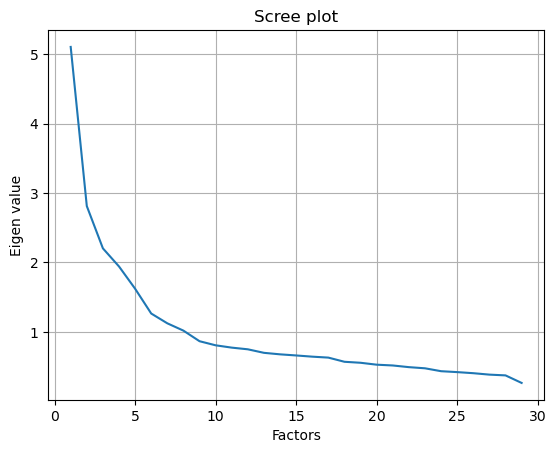

In [6]:
import matplotlib.pyplot as plt
ev,_ = fa.get_eigenvalues()
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree plot')
plt.xlabel('Factors')
plt.ylabel('Eigen value')
plt.grid()

In [7]:
loading = pd.DataFrame(fa.loadings_, index=df.columns)
loading

,0,1,2
Unnamed: 0,-0.053051,-0.013375,0.035530
A1,-0.233737,0.079743,0.028746
A2,0.559217,0.060155,0.055566
A3,0.647212,0.033547,0.031983
A4,0.434010,-0.070057,0.016030
A5,0.619661,-0.101364,0.019852
C1,0.004073,0.087325,0.575329
C2,0.055632,0.135663,0.532456
C3,0.062455,-0.007680,0.399205
C4,-0.007680,0.188342,-0.514373


In [8]:
comm = pd.DataFrame(fa.get_communalities(),index=df.columns,columns=['Communality'])
comm

,Communality
Unnamed: 0,0.004256
A1,0.061818
A2,0.319430
A3,0.421032
A4,0.193529
A5,0.394649
C1,0.338646
C2,0.305009
C3,0.163324
C4,0.300112
